In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline





In [2]:


data=pd.read_csv('t_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:

data.drop(columns=['PassengerId','Ticket'],axis=1,inplace=True)

In [5]:
data.shape

(891, 10)

In [6]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

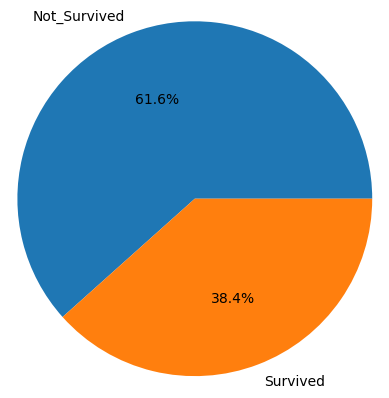

In [7]:
plt.pie(x=data['Survived'].value_counts(),labels=['Not_Survived','Survived'],autopct='%1.1f%%',radius=1.2);

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [9]:
data.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
for i in data.columns:
    print(i,'---',data[i].dtypes,'--',data[i].unique()[:15],'\n')

Survived --- int64 -- [0 1] 

Pclass --- int64 -- [3 1 2] 

Name --- object -- ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'] 

Sex --- object -- ['male' 'female'] 

Age --- float64 -- [22. 38. 26. 35. nan 54.  2. 27. 14.  4. 58. 20. 39. 55. 31.] 

SibSp --- int64 -- [1 0 3 4 2 5 8] 

Parch --- int64 -- [0 1 2 5 3 4 6] 

Fare --- float64 -- [ 7.25   71.2833  7.925  53.1     8.05    8.4583 51.8625 21.075  11.1333
 30.0708 16.7    26.55   31.275   7.8542 16.    ] 

Cabin --- object -- [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D5

In [11]:
for i in data.columns:
    print(i,'---',data[i].dtypes,'--',data[i].value_counts().count(),'\n')

Survived --- int64 -- 2 

Pclass --- int64 -- 3 

Name --- object -- 891 

Sex --- object -- 2 

Age --- float64 -- 88 

SibSp --- int64 -- 7 

Parch --- int64 -- 7 

Fare --- float64 -- 248 

Cabin --- object -- 147 

Embarked --- object -- 3 



In [12]:
numeric=[fea for fea in data.columns if data[fea].dtypes !='O']
disceate=[fea for fea in numeric if data[fea].value_counts().count()<25]
catgorical=[fea for fea in data.columns if data[fea].dtypes =='O']

numeric,disceate,catgorical

(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
 ['Survived', 'Pclass', 'SibSp', 'Parch'],
 ['Name', 'Sex', 'Cabin', 'Embarked'])

In [13]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
null_features=[features for features in data.columns if data[features].isnull().sum() > 0]
null_features

['Age', 'Cabin', 'Embarked']

In [15]:
data[null_features].isnull().mean()*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

<AxesSubplot:>

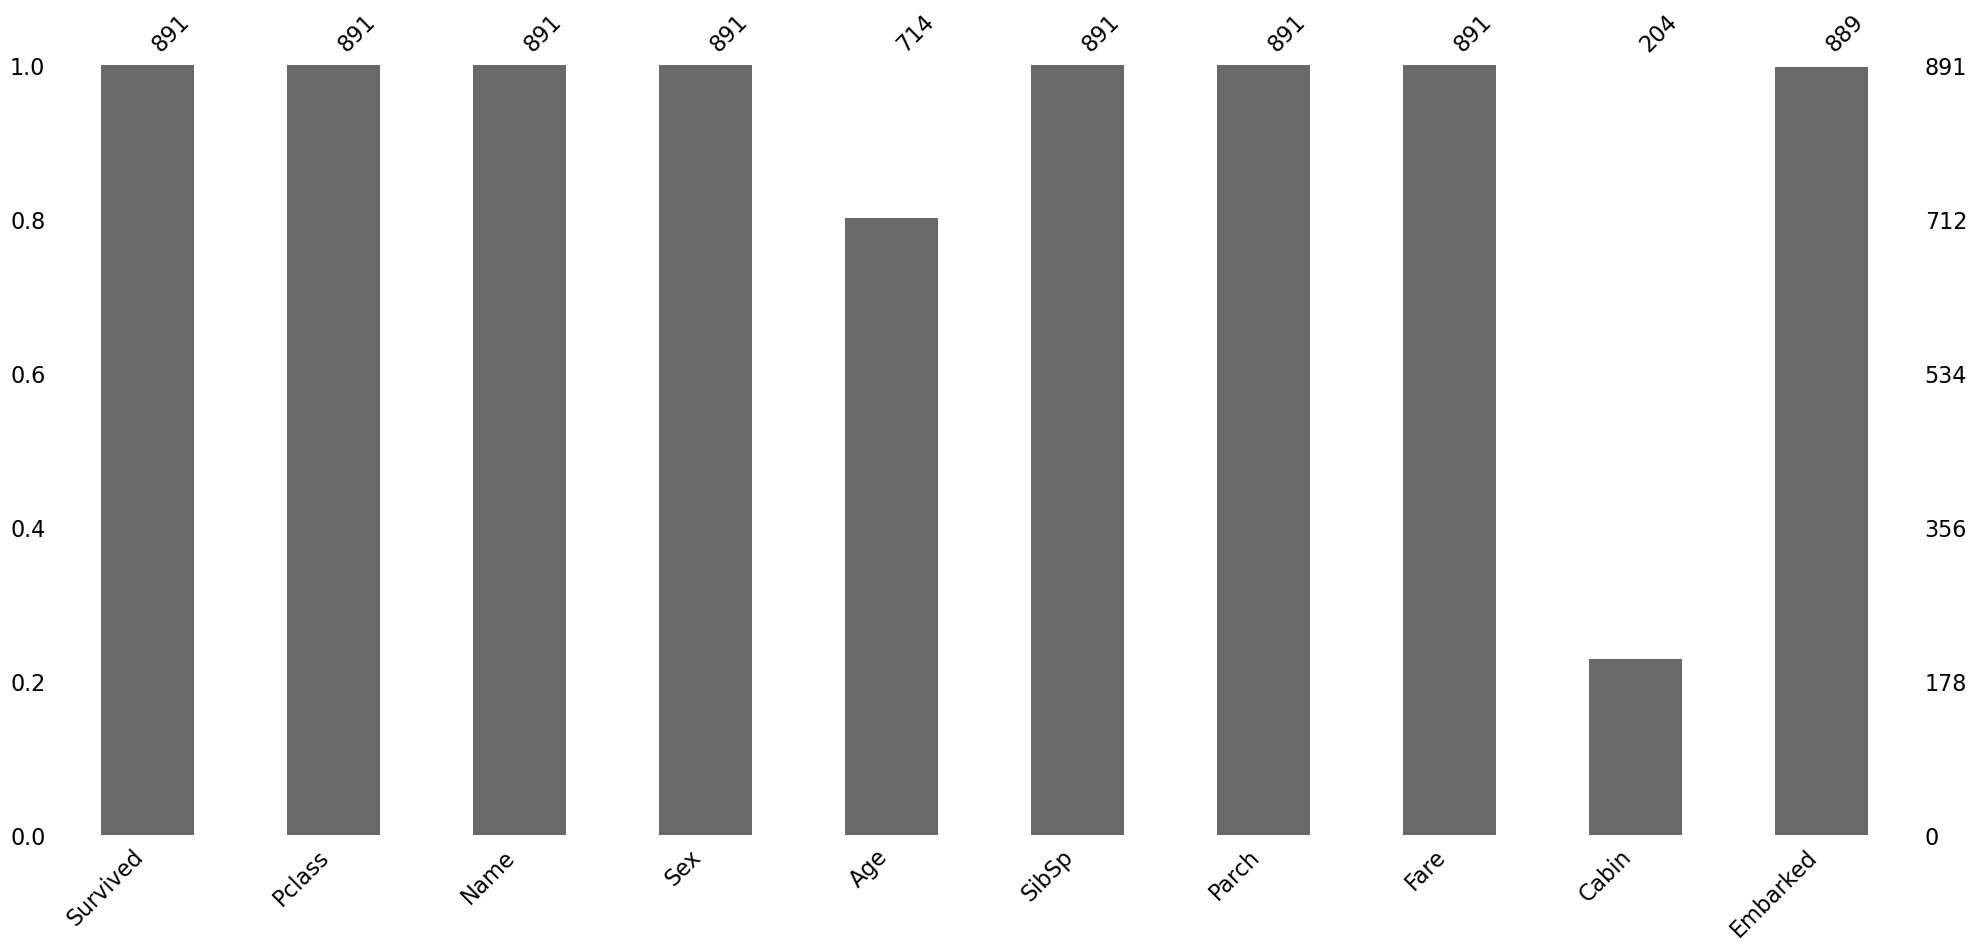

In [16]:
import missingno as msng
msng.bar(data)

<AxesSubplot:>

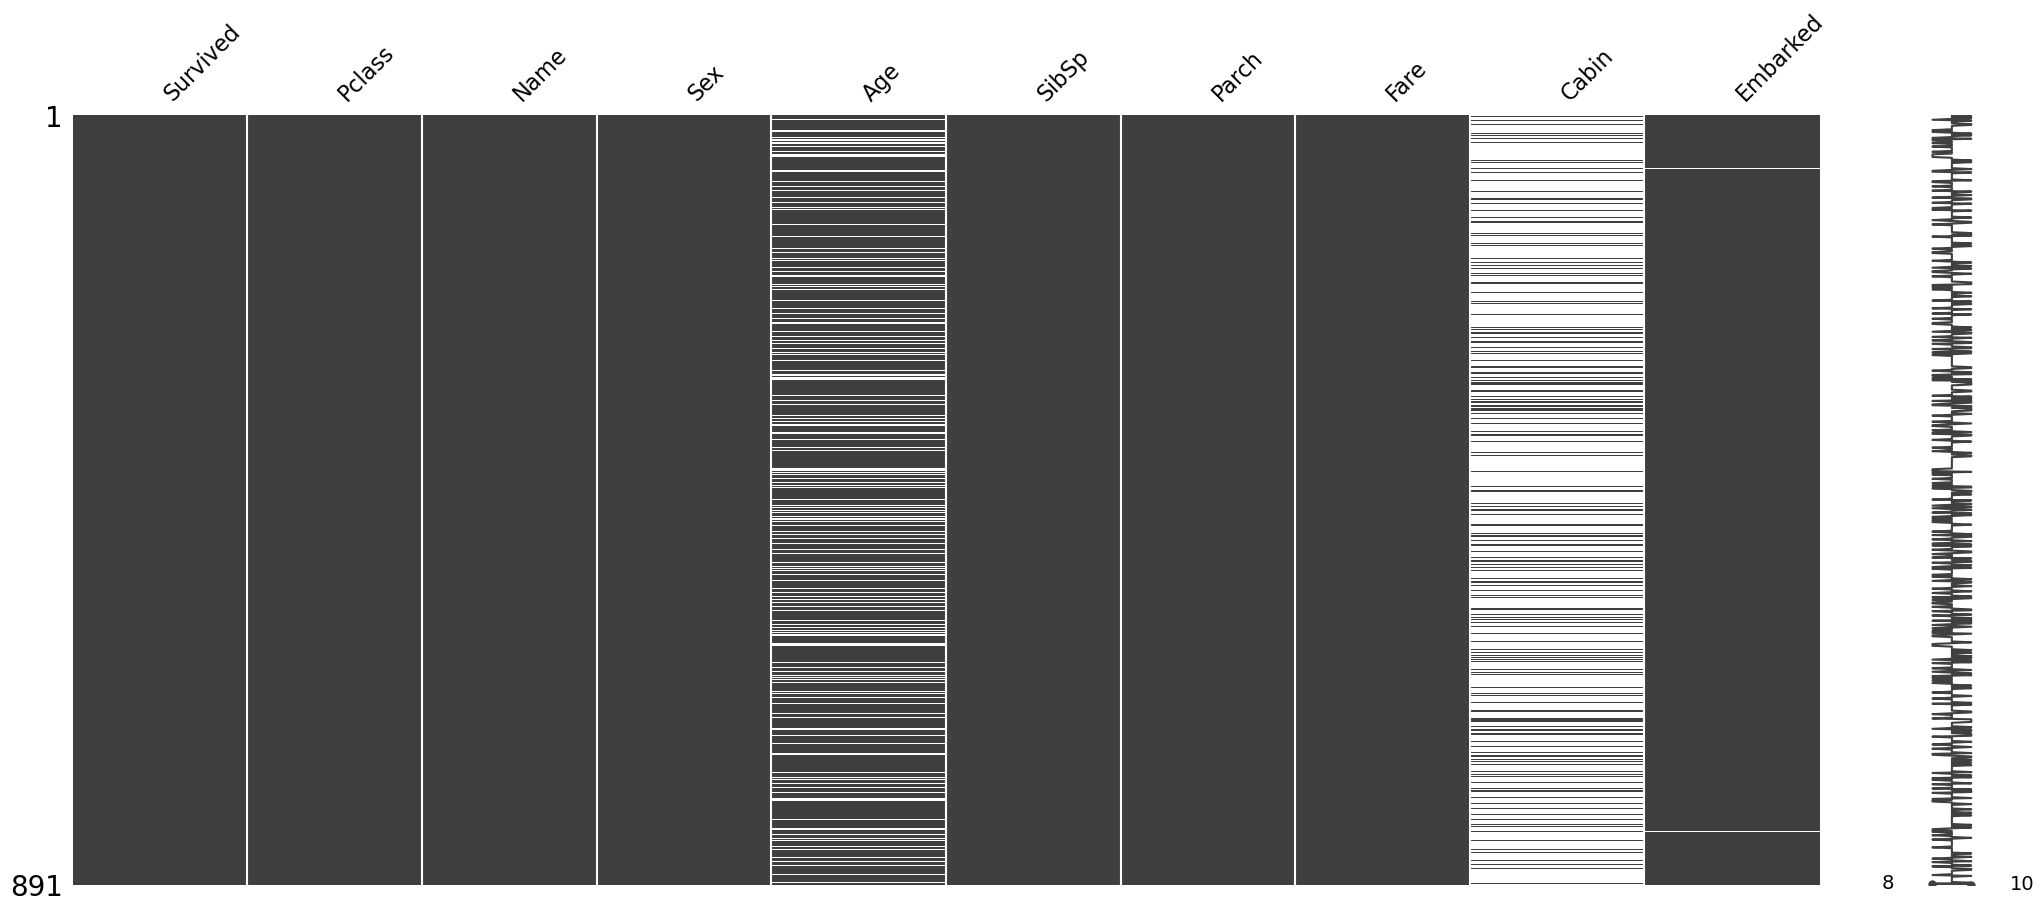

In [17]:
msng.matrix(data)

<AxesSubplot:>

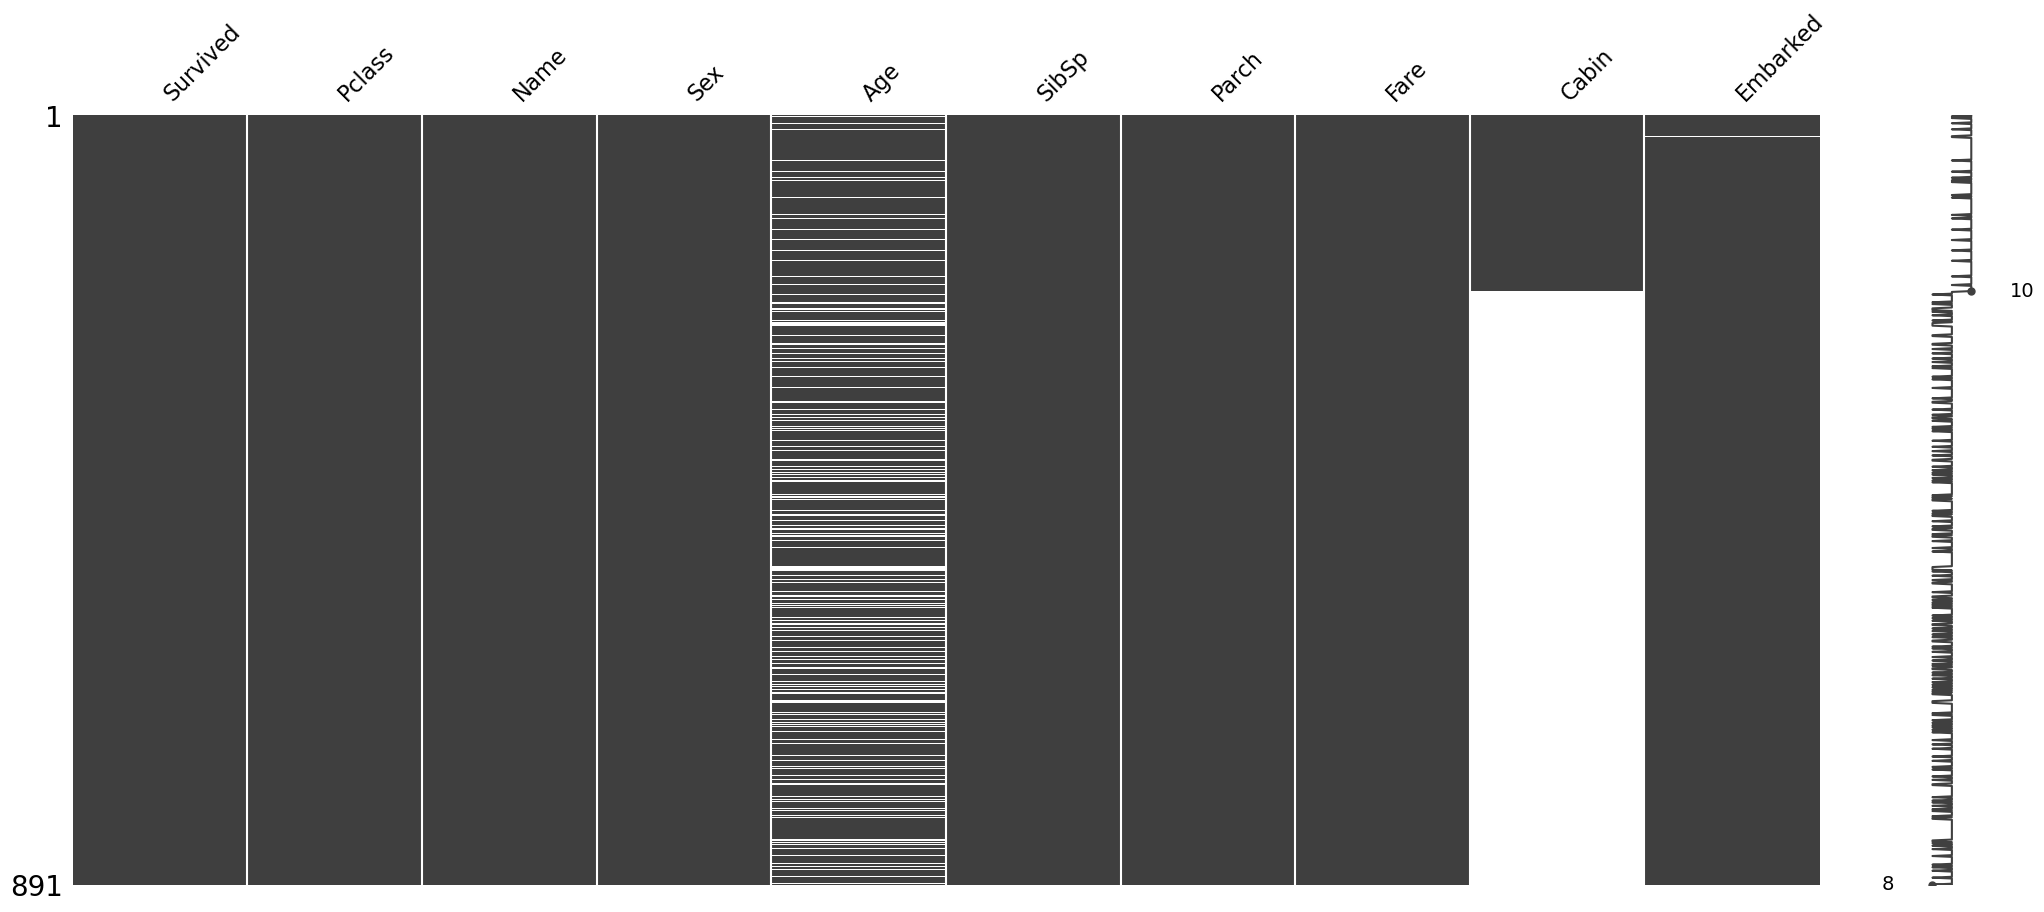

In [18]:
sort=data.sort_values('Cabin')
msng.matrix(sort)

<AxesSubplot:>

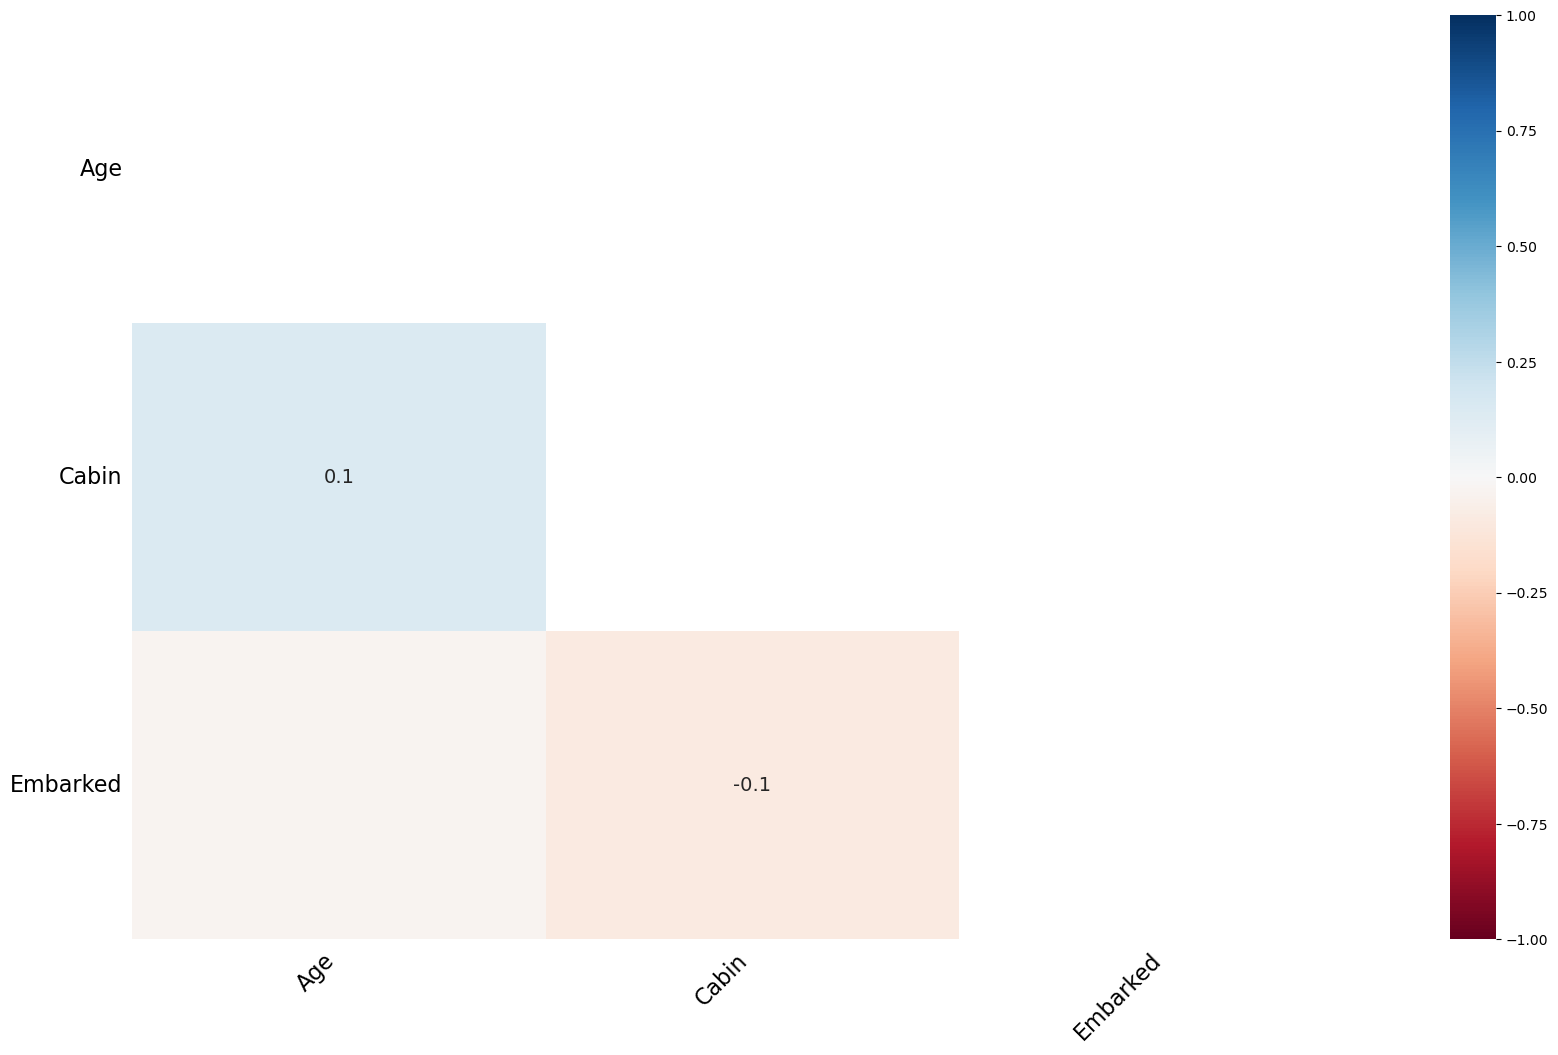

In [19]:
msng.heatmap(data)

# missing value Handling

In [20]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [21]:
data.drop(['Cabin'], axis=1, inplace=True)

In [22]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [23]:
data.isnull().mean()*100

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

#  Exploratory data analysis

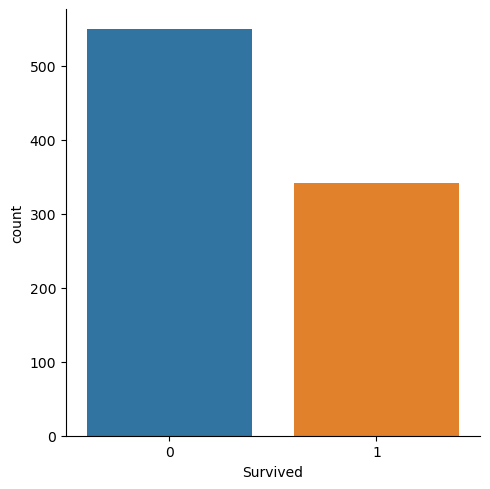

In [24]:
sns.catplot(x='Survived',data=data,kind='count')

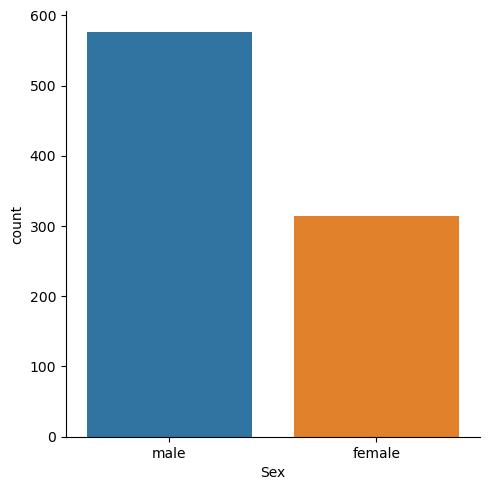

In [25]:
sns.catplot(x='Sex',data=data,kind='count')

<AxesSubplot:xlabel='Age', ylabel='Count'>

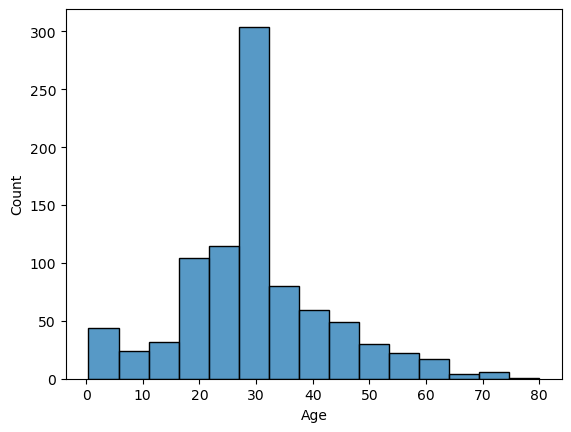

In [26]:
sns.histplot(data=data,x='Age',bins=15)

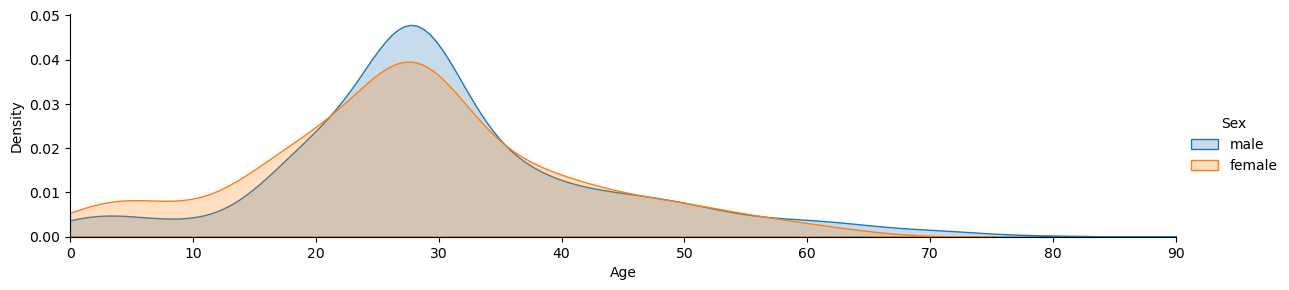

In [27]:
fig = sns.FacetGrid(data,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,90))
fig.add_legend()

<AxesSubplot:xlabel='Survived', ylabel='Age'>

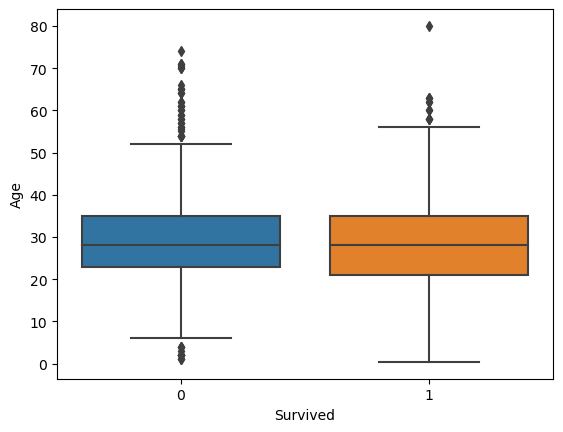

In [28]:
sns.boxplot(data=data,x='Survived',y='Age')


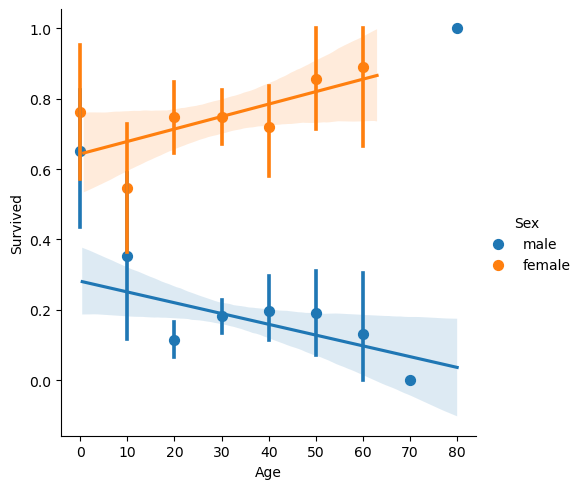

In [29]:
sns.lmplot(data=data,x='Age',y='Survived',hue='Sex', x_bins=[0,10,20,30,40,50,60,70,80,90])

In [30]:
def adult(pas):
    age,sex =pas
    return 'child' if age < 16 else sex

data['Person']=data[['Age','Sex']].apply(adult,axis=1)


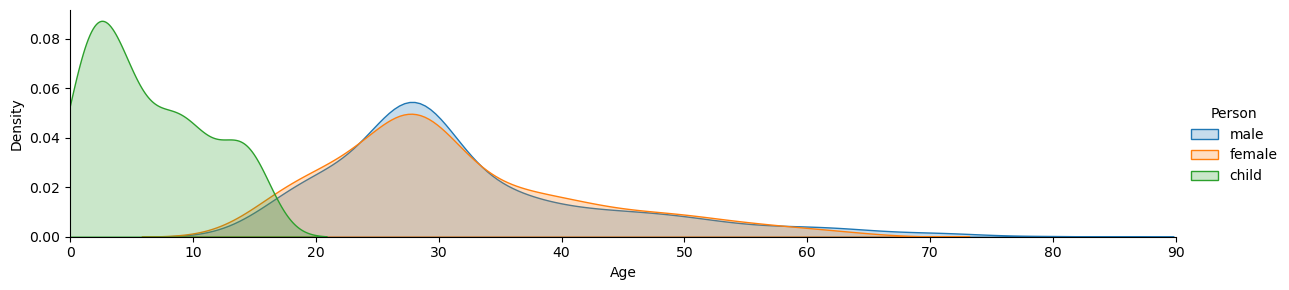

In [31]:
fig=sns.FacetGrid(data=data,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,90))
fig.add_legend()

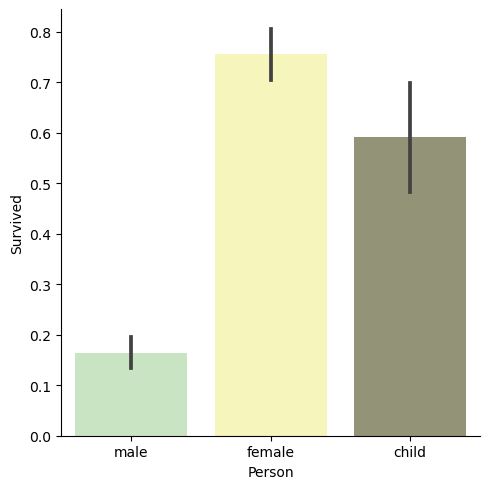

In [32]:
sns.catplot(x='Person',y='Survived',kind='bar', data=data, palette ='Set3_d')

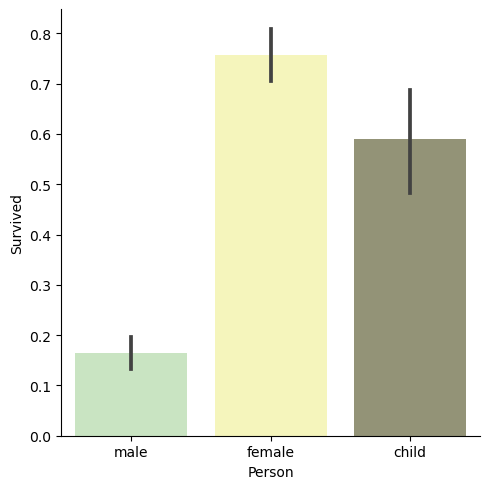

In [33]:
sns.catplot(x='Person',y='Survived',kind='bar', data=data, palette ='Set3_d')

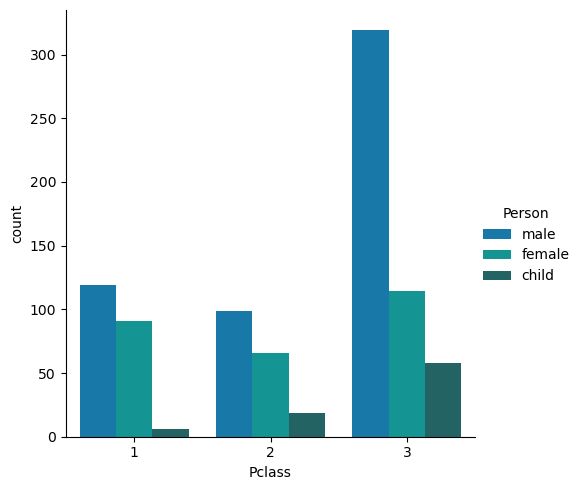

In [34]:
sns.catplot(x="Pclass", data=data, hue="Person", kind="count", palette='winter_d')

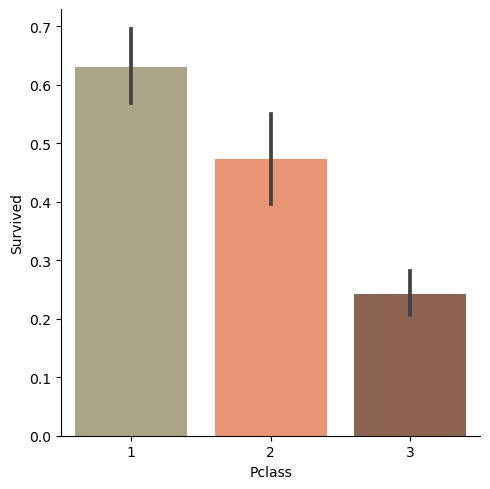

In [35]:
sns.catplot(x='Pclass',y='Survived',kind='bar', data=data, palette = 'Set2_d')

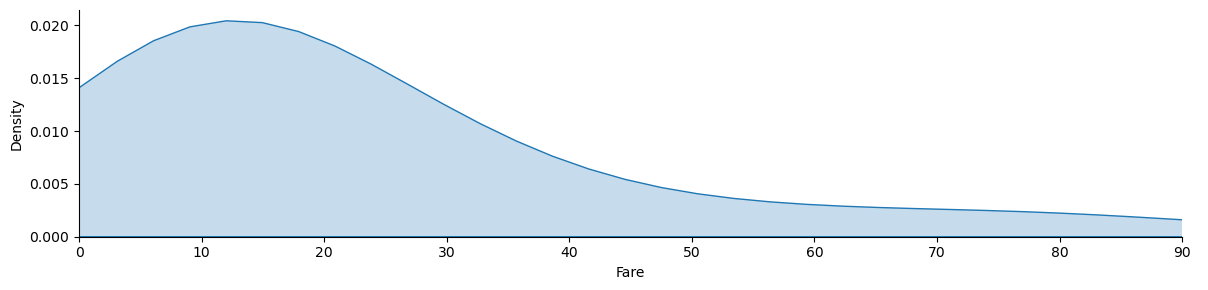

In [36]:
fig = sns.FacetGrid(data,aspect=4)
fig.map(sns.kdeplot,'Fare',shade= True)
fig.set(xlim=(0,90))
fig.add_legend()

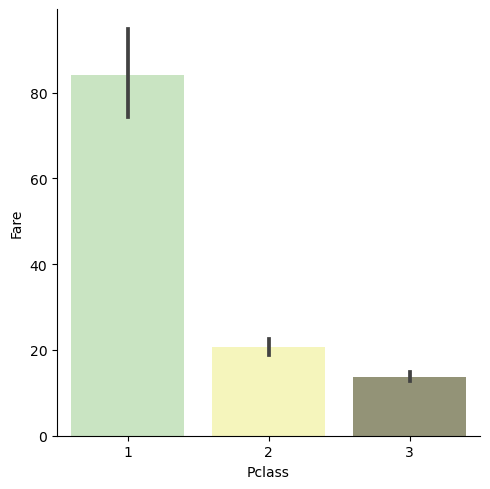

In [37]:
sns.catplot(x='Pclass',y='Fare',kind='bar', data=data, palette ='Set3_d')

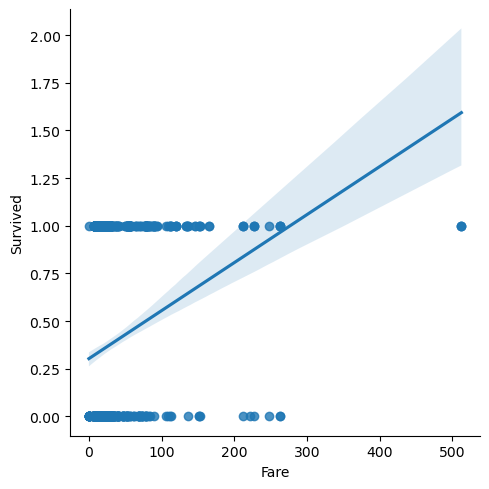

In [38]:
sns.lmplot(x='Fare',y='Survived',data=data)

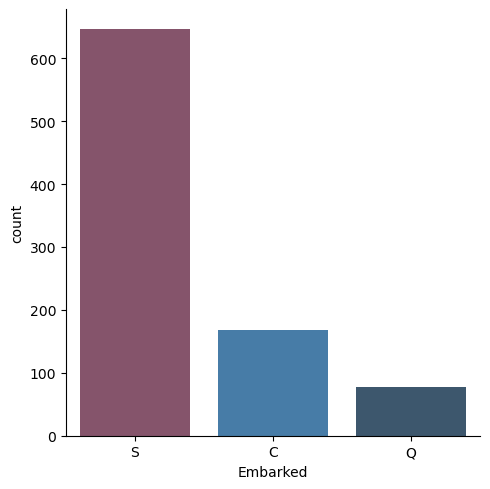

In [39]:
sns.catplot(x="Embarked", data=data, kind="count", palette='Set1_d')

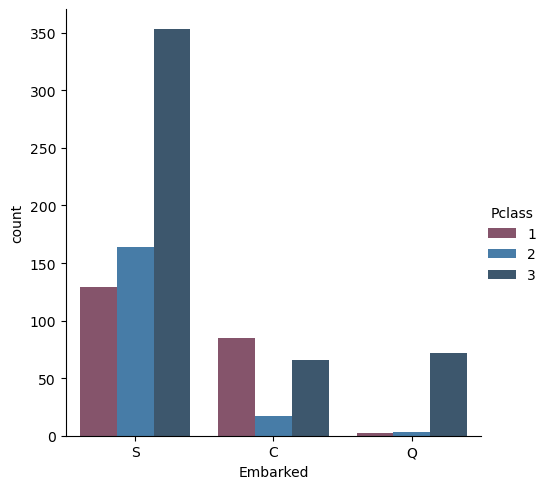

In [40]:
sns.catplot(x="Embarked", data=data, kind="count", hue='Pclass', palette='Set1_d')

In [41]:
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [42]:
data['Title']=data['Name'].str.extract('([A-Za-z]+)\.',expand=False)


In [43]:
data.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [44]:
data['Title']=data['Title'].replace([ 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess',
       'Jonkheer'],'Rare')
data['Title']=data['Title'].replace('Mlle','Miss')
data['Title']=data['Title'].replace('Mee','Mrs')

In [45]:
data['Title'].value_counts()

Mr        517
Miss      184
Mrs       125
Master     40
Rare       25
Name: Title, dtype: int64

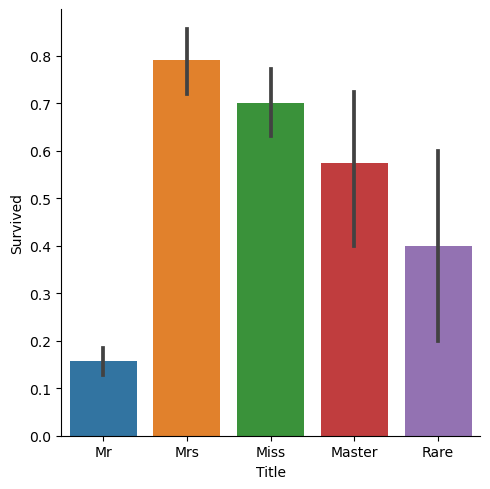

In [46]:
sns.catplot(data=data,x='Title',y='Survived',kind='bar')

In [47]:
data['Alone']=(data['SibSp']+data['Parch']==0)
def a(aa):
      return 'Alone'  if aa==True else 'With Family'
data['Family']=data['Alone'].apply(a)

In [48]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Person,Title,Alone,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,male,Mr,False,With Family
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,female,Mrs,False,With Family
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,female,Miss,True,Alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,female,Mrs,False,With Family
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,male,Mr,True,Alone


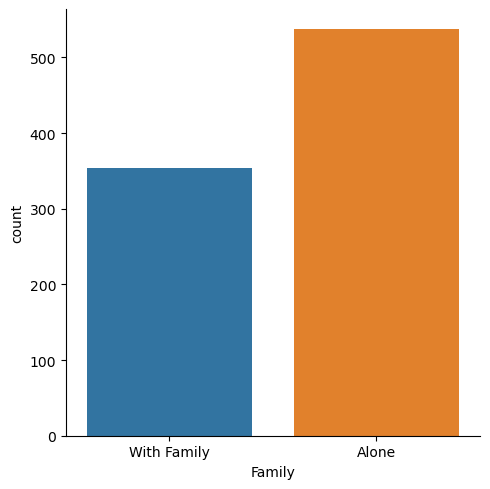

In [49]:
sns.catplot(data=data,x='Family',kind='count')

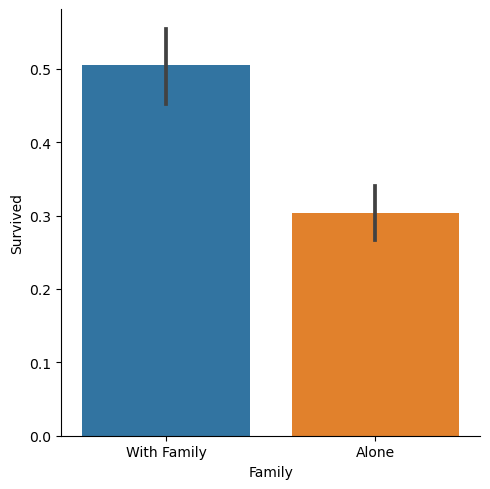

In [50]:
sns.catplot(data=data,x='Family',y='Survived',kind='bar')

In [51]:
df_test=pd.read_csv('t_test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
df_test.drop(['Ticket'], axis=1, inplace=True)
df_test.drop(['Cabin'], axis=1, inplace=True)

In [53]:
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Don', 'Dona', 'Ms'], 'Rare')
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')

In [54]:
df_test.drop(['Name'], axis=1, inplace=True)

In [55]:
df_test['Alone'] = (df_test['SibSp'] + df_test['Parch'] == 0)

def Alone_or_not (passenger):
    if passenger == True:
        return "Alone"
    if passenger == False:
        return "With Family"

df_test['Family'] = df_test['Alone'].apply(Alone_or_not)

In [56]:
df_test.drop(['SibSp', 'Parch', 'Alone' ], axis=1, inplace=True)

In [57]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            1
Embarked        0
Title           0
Family          0
dtype: int64

In [58]:
df_test['Age'] = df_test['Age'].fillna(data['Age'].median())
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Title          0
Family         0
dtype: int64

In [59]:
data.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [60]:
df_test['Fare']=df_test.groupby('Pclass')['Fare'].transform(lambda val: val.fillna(val.mean()))
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
Family         0
dtype: int64

In [61]:
y = data['Survived']
data.drop(['Person', 'SibSp', 'Parch', 'Name', 'Alone', 'Survived' ], axis=1, inplace=True)

In [62]:
df = pd.concat([data , df_test], axis=0)
df.index = np.arange(1, len(df) + 1)
df

,Pclass,Sex,Age,Fare,Embarked,Title,Family,PassengerId
1,3,male,22.0,7.2500,S,Mr,With Family,NaN
2,1,female,38.0,71.2833,C,Mrs,With Family,NaN
3,3,female,26.0,7.9250,S,Miss,Alone,NaN
4,1,female,35.0,53.1000,S,Mrs,With Family,NaN
5,3,male,35.0,8.0500,S,Mr,Alone,NaN
...,...,...,...,...,...,...,...,...
1305,3,male,28.0,8.0500,S,Mr,Alone,1305.0
1306,1,female,39.0,108.9000,C,Rare,Alone,1306.0
1307,3,male,38.5,7.2500,S,Mr,Alone,1307.0
1308,3,male,28.0,8.0500,S,Mr,Alone,1308.0


In [63]:
df.drop(columns=['PassengerId' ], axis=1, inplace=True)

In [64]:
df

,Pclass,Sex,Age,Fare,Embarked,Title,Family
1,3,male,22.0,7.2500,S,Mr,With Family
2,1,female,38.0,71.2833,C,Mrs,With Family
3,3,female,26.0,7.9250,S,Miss,Alone
4,1,female,35.0,53.1000,S,Mrs,With Family
5,3,male,35.0,8.0500,S,Mr,Alone
...,...,...,...,...,...,...,...
1305,3,male,28.0,8.0500,S,Mr,Alone
1306,1,female,39.0,108.9000,C,Rare,Alone
1307,3,male,38.5,7.2500,S,Mr,Alone
1308,3,male,28.0,8.0500,S,Mr,Alone


In [65]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')

In [66]:
df_obj= pd.get_dummies(df_obj, drop_first=True)

In [67]:
df_obj_train = df_obj.iloc[:891, :]
df_obj_test = df_obj.iloc[891:, :]

In [68]:
df_num_train = df_num.iloc[:891, :]
df_num_test = df_num.iloc[891:, :]

In [69]:
names = df_num_train.columns

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(df_num_train)
df_num_train= scaler.transform(df_num_train)
df_num_test= scaler.transform(df_num_test)

df_num_train = pd.DataFrame(df_num_train, columns= names)
df_num_train.index = np.arange(1, len(df_num_train) + 1)

df_num_test = pd.DataFrame(df_num_test, columns= names)
df_num_test.index = np.arange(892, 892 + len(df_num_test))

In [70]:
df_train = pd.concat([df_num_train, df_obj_train], axis=1)
df_test = pd.concat([df_num_test, df_obj_test], axis=1)
df_test

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Family_With Family
892,0.827377,0.394887,-0.490783,1,1,0,0,1,0,0,0
893,0.827377,1.355510,-0.507479,0,0,1,0,0,1,0,1
894,-0.369365,2.508257,-0.453367,1,1,0,0,1,0,0,0
895,0.827377,-0.181487,-0.474005,1,0,1,0,1,0,0,0
896,0.827377,-0.565736,-0.401017,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1305,0.827377,-0.104637,-0.486337,1,0,1,0,1,0,0,0
1306,-1.566107,0.740711,1.544246,0,0,0,0,0,0,1,0
1307,0.827377,0.702286,-0.502445,1,0,1,0,1,0,0,0
1308,0.827377,-0.104637,-0.486337,1,0,1,0,1,0,0,0


In [71]:
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression()
log_model.fit(df_train, y)

LogisticRegression()

In [72]:
log_model.coef_

array([[-0.96864998, -0.35872764,  0.0383133 , -1.18002304, -0.06369767,
        -0.55679331, -0.42354409, -1.8896055 ,  0.34861622, -1.3473233 ,
        -0.50345159]])

In [73]:
y_pred_lr= log_model.predict(df_test)
y_pred_lr

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [74]:
y_test=pd.read_csv('gender_submission.csv')
y_test_e = y_test['Survived'].to_numpy()
y_test_e

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [76]:
accuracy_score(y_test_e, y_pred_lr)

0.9425837320574163

In [77]:
confusion_matrix(y_test_e, y_pred_lr)

array([[250,  16],
       [  8, 144]], dtype=int64)

C:\Users\mani\Desktop\sample_pro\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


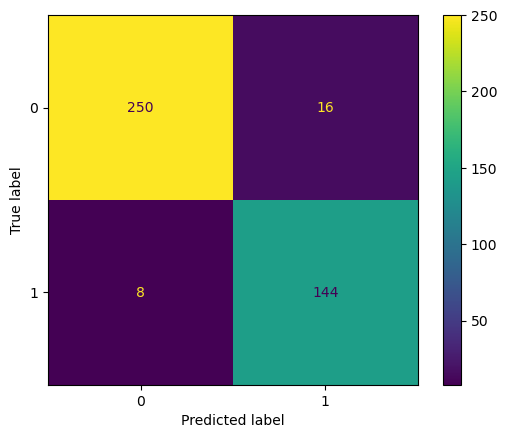

In [78]:
plot_confusion_matrix(log_model, df_test , y_test_e)

In [79]:
print(classification_report(y_test_e, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       266
           1       0.90      0.95      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



In [80]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

C:\Users\mani\Desktop\sample_pro\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


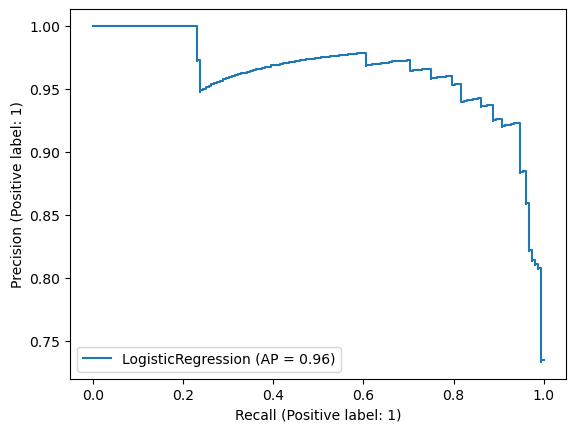

In [81]:
plot_precision_recall_curve(log_model, df_test, y_test_e)

C:\Users\mani\Desktop\sample_pro\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


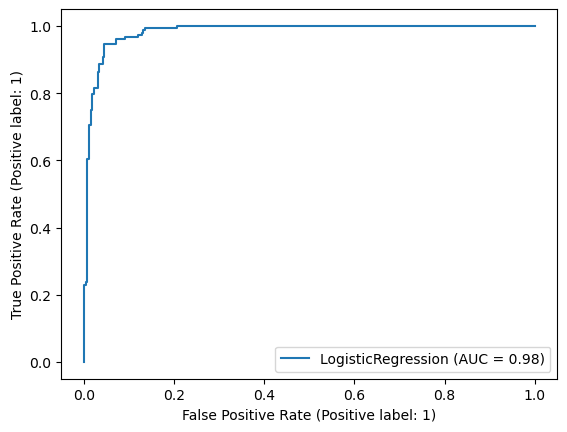

In [82]:
plot_roc_curve(log_model, df_test, y_test_e)